<a href="https://colab.research.google.com/github/mkhfring/cosc419-notes/blob/main/week3/gradient_decent_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img title="a title" alt="Alt text" src="https://github.com/mkhfring/cosc419-notes/blob/main/1.png?raw=1">

# Nural networks
Neural networks are essentially mathematical expressions. They take the input data and the weights of the network, and then form a mathematical expression to compute or predict the output.

- While backpropagation is commonly used to train neural networks and predict outputs, it is a general mathematical algorithm, not exclusively designed for neural networks

# Why we need to calculate derivitives?

# In terms of neural networks, we are not going to calculate the derivatives using formulas that we learned in calculus. In this course, we will use the definition of derivitives to calculate the output of a neural network.

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
  return 3*x**2 - 4*x + 5

In [ ]:
f(3.0)

20.0

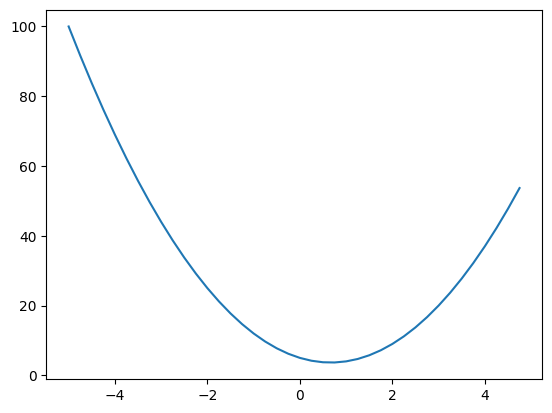

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [ ]:
h = 0.001 # We can make this number smaller
x = 3.0 # What if we make this number negative
(f(x + h) - f(x))/h

14.00300000000243

In [ ]:
h = 0.000001
x = 2/3
(f(x + h) - f(x))/h

2.999378523327323e-06

# We need to normalise the rise over the run to get the slope of a function

In [ ]:
# les get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [ ]:
h = 0.0001

# inputs to expression graph
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c

a += h

d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [ ]:
h = 0.0001

# inputs to expression graph
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c

b += h

d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [ ]:
h = 0.0001

# inputs to expression graph
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)


d1 4.0
d2 4.0001
slope 0.9999999999976694


# Remember that the expressoin that we worked on was very simple compares to the expressions that we aim to solve in terms of deep learning. Therefore, we need a data structure to calculate the derivatives.



In [ ]:
class Value:

  def __init__(self, data):
    self.data = data


  def __repr__(self):
    return f"Value(data={self.data})"

In [ ]:
a = Value(data=2.0)
a

Value(data=2.0)

In [ ]:
a = Value(2.0)
b = Value(-3.0)
a + b

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'

In [ ]:
class Value:

  def __init__(self, data):
    self.data = data

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data)
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data)
    return out


In [ ]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
d

Value(data=4.0)

In [ ]:
class Value:

  def __init__(self, data, _children = (), _opt = '', label = ''):
    self.data = data
    self._prev = set(_children)
    self._op = _opt
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, _opt="+", _children=(self, other))
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, _opt="*", _children=(self, other))
    return out

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label= "%s | {data %.4f}" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


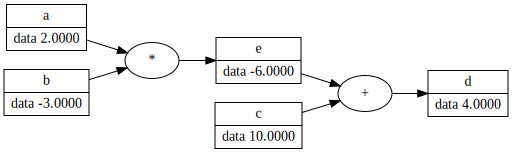

In [ ]:
draw_dot(d)

In [ ]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'


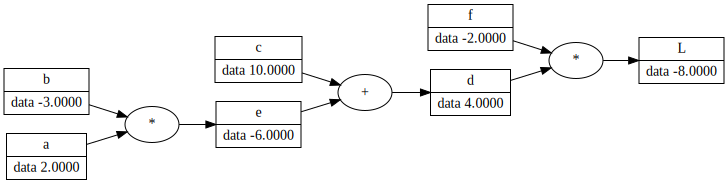

In [ ]:
draw_dot(L)

# Using this approach we can build the mathematical expression. This approach to making a mathematical expression is called the forward pass. In neural networks however, we are interested to see the effect of each value (variable) on the input. In other words, we want to see the effect of that variable on the output if we nudge it just a little bit. So, in the case of the expression that we made in previous example, we want to see the derivative of L with respect to L, d, f, e, ...

## In neural networks, we intend to calculate the derivative of the output node with respect to the leafe nodes, a.k. wights of the network. The output is also called as the loss function.

In [ ]:
class Value:

  def __init__(self, data, _children = (), _opt = '', label = ''):
    self.data = data
    self.grad = 0.0
    self._prev = set(_children)
    self._op = _opt
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, _opt="+", _children=(self, other))
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, _opt="*", _children=(self, other))
    return out

{Value(data=-6.0), Value(data=10.0)}

In [ ]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'


In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label= " { %s| data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


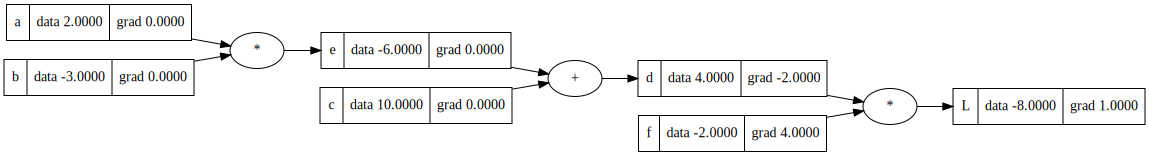

In [ ]:
draw_dot(L)

To compute the gradient of each node with respect to the output, we use backpropagation. Backpropagation is a recursive algorithm that starts with the very last node, a.k.a. the output, and calculates the derivative of each node all the way up to the leaf nodes. For instance, in the previous computational graph, we will start with computing dL/dL all the way up to da/dL and db/dL. Note that the derivative of the output with respect to itself is always 1. So, in the previous example, dL/dL = 1. For other nodes, we need to use the chain rule. In the chain rule, we first compute the local derivative and multiply it by the gradient of the output node. For instance, here dd/dL = dd/dL * dL/dL, which is dd/dL. Similarly, de/dL = de/dd * dd/dL. To compute the local gradient, we can use basic calculus as follows:

-  L = a * b  => da/dL = b and db/dL = a
- L = a + b => da/dL = 1 and db/dL = 1

Considering basic calculus, de/dd = 1 and dd/dL is d.grad. Accordingly, e.grad = 1 * d.grad = -2.00. Following shows the gradient of each node:
- f.grad = d.data * 1
- c.grad = d.grad (we have + node and dc/dL = 1 based on basic calculus)
- a.grad = b.data * e.grad
- b.grad = a.data * e.grad


In [ ]:
L.grad = 1.0
d.grad = f.data
f.grad = d.data

e.grad = d.grad
c.grad = d.grad

a.grad = (-2.0 * -3.0)
b.grad = (-2.0 * 2)

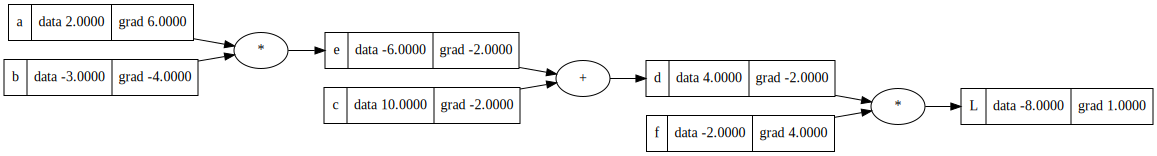

In [ ]:
draw_dot(L)

In [ ]:
 def lol():

  h = 0.001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  f.data += h
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)

lol()

3.9999999999995595


In [ ]:
a.data = 0.01 * a.grad
b.data = 0.01 * b.grad
c.data = 0.01 * c.grad
f.data = 0.01 * f.grad

e = a * b
d = e + c
L = d * f
L

Value(data=-0.000896)

In [ ]:
L.grad = 1.0

# Next lets see what is the derivatived of L with respecd to d and f. Other words, what is dL/dd=?
# What we aim to calculate is L = d * f
# What is dL/dd? f (from calculus)

# dL / dd = (f(x + h) - f(x)) / h
# = ((d+h) * f - d*f) / h
# (fd + fh - df) / h
# fh / h = f

In [ ]:
f.grad = d.data # 4.0
d.grad = f.data # -2.0

In [ ]:
# Now let's calculate dL/dc. This one is the most important node. If we know how to calculate this one then we can calculate backpropagation for all other nodes easily.
# We know how to calculate the impact of d on L. We also know the impact of c on d similarly. now we need to see how to compute the impact of c on L

# What is dd/dc?
# d = c + e | grad = 1.0 from calculus

# Use (f(x+h) - f(x)) / h to show grad is 1.0
# this can be called the local derivative.
# to calculate the dL/dc we need to use the chain rule
# dL / dc = dL/dd . dd/dc
# if a car is twice as fast as a bicycle and a car is 4 times as fast as a walking man, then the car is 8 times as fast as a walking man

# WANT: dL/dc = dL/dd . dd/dc
# Know: dL/dd and dd/dc

# The plus node just routes the gradient. Becuase the plus node derivatives are 1.0 and the chain rule indicates 1 * dL/dd
c.grad = -2.0
e.grad = -2.0

In [ ]:
# WANT: dL / da = dL/de * de/da
# KNOW:
#  dL/de = -2.0
# e = a * b
# de/da = ? | b (from calculus)
a.grad = (-2.0 * b.data)
b.grad = (-2.0 * a.data)

In [ ]:
class Value:

  def __init__(self, data, _children = (), _opt = '', label = ''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None

    self._prev = set(_children)
    self._op = _opt
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, _opt="+", _children=(self, other))
    def _backward():
      self.grad = 1.0 * out.grad
      other.grad = 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, _opt="*", _children=(self, other))
    def _backward():
      self.grad = other.data * out.grad
      other.grad = self.data * out.grad
    out._backward = _backward

    return out

Value(data=-8.0)

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


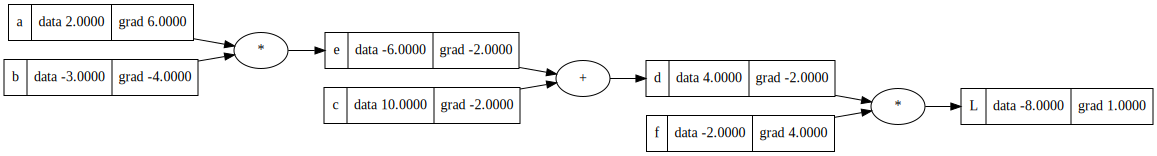

In [ ]:
draw_dot(L)

In [ ]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)


-7.286496


In [ ]:
def lol():

  h = 0.001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  b.data += h
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)

lol()

-3.9999999999995595


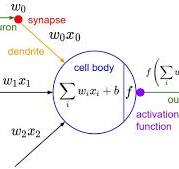

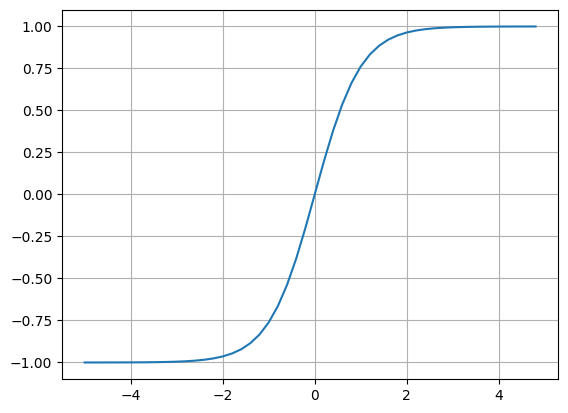

In [ ]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [ ]:
class Value:

  def __init__(self, data, _children = (), _opt = '', label = ''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None

    self._prev = set(_children)
    self._op = _opt
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, _opt="+", _children=(self, other))
    def _backward():
      self.grad = 1.0 * out.grad
      other.grad = 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, _opt="*", _children=(self, other))
    def _backward():
      self.grad = other.data * out.grad
      other.grad = self.data * out.grad
    out._backward = _backward

    return out

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'


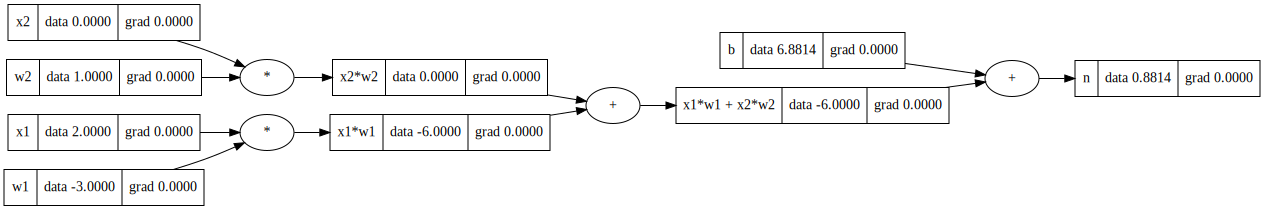

In [ ]:
draw_dot(n)

In [ ]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0

    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')

    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')


    return out




In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

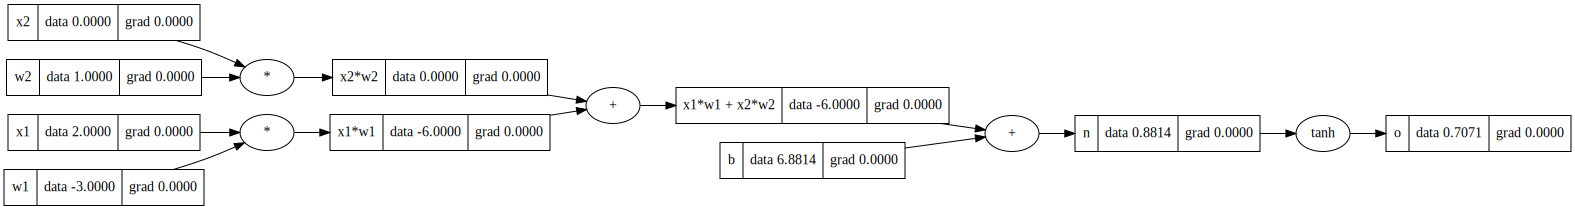

In [ ]:
draw_dot(o)

In [ ]:
o.grad = 1.0

In [ ]:
# What is d0/dn?
# o = tanh(n)
# do/dn = 1 - tanh(n)**2 = 1 - o**2

In [ ]:
n.grad = 1.0 - o.data**2

In [ ]:
x1w1x2w2.grad = n.grad
b.grad = n.grad

In [ ]:
x2w2.grad = 0.5
x1w1.grad = 0.5

In [ ]:
w2.grad = x2.data * x2w2.grad
x2.grad = w2.data * x2w2.grad
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

In [ ]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

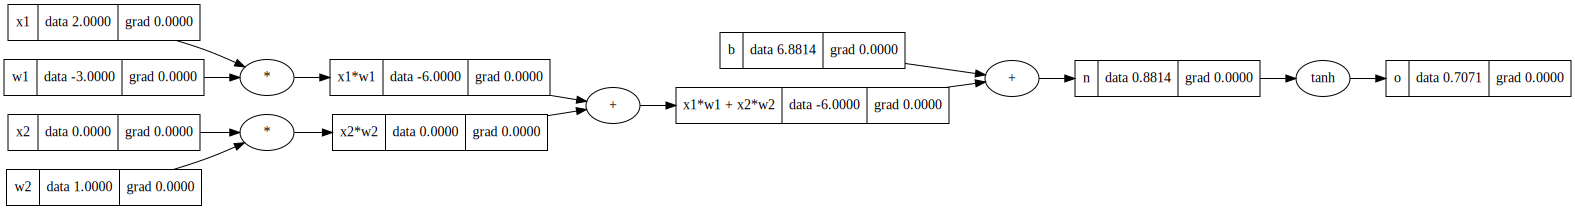

In [ ]:
draw_dot(o)

In [ ]:
o.grad = 1.0
o._backward()

In [ ]:
n._backward()

In [ ]:
o.backward()

In [ ]:
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

[Value(data=6.881373587019543),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

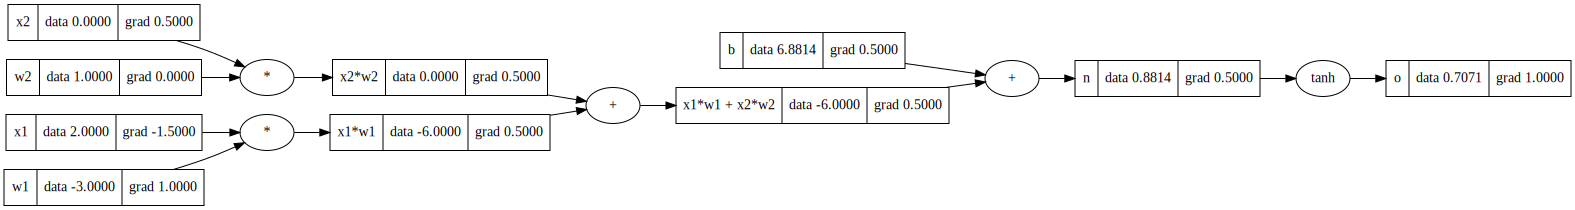

In [ ]:
draw_dot(o)

In [ ]:
o.backward()

# Explain the bug that would occur in early versions of our implementation

In [ ]:
n._backward()

In [ ]:
b._backward()

In [ ]:
x1w1x2w2._backward()

In [ ]:
x2w2._backward()
x1w1._backward()

In [ ]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

In [ ]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [ ]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [ ]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [ ]:
n.grad = 0.5

In [ ]:
o.grad = 1.0

In [ ]:
1 - o.data**2

0.4999999999999999

In [ ]:
# o = tanh(n)
# do/dn = 1 - o**2

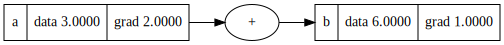

In [ ]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

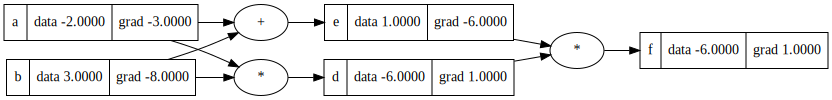

In [ ]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)